In [94]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(lmerTest)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

data <- read.csv("../input/diabetes/diabetes.csv")
head(data)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


do a correlation analysis

# EDA


In [95]:
summary(data)

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           bmi           diabetes           age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
      test      
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 

## Check for inconsistent values
we have columns: 0 glucose (in reality it would mean imminent death risk= impossible for our dataset), 0 diastolic, 0 triceps, 0 insuline, 0 bmi---- we impute them with the mean

In [96]:
frequencies <- lapply(data, table)

# Display the result
frequencies

$pregnant

  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17 
111 135 103  75  68  57  50  45  38  28  24  11   9  10   2   1   1 

$glucose

  0  44  56  57  61  62  65  67  68  71  72  73  74  75  76  77  78  79  80  81 
  5   1   1   2   1   1   1   1   3   4   1   3   4   2   2   2   4   3   6   6 
 82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 
  3   6  10   7   3   7   9   6  11   9   9   7   7  13   8   9   3  17  17   9 
102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 
 13   9   6  13  14  11  13  12   6  14  13   5  11  10   7  11   6  11  11   6 
122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 
 12   9  11  14   9   5  11  14   7   5   5   5   6   4   8   8   5   8   5   5 
142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 
  5   6   7   5   9   7   4   1   3   6   4   2   6   5   3   2   8   2   1   3 
162 163 164 165 166 167 168 16

In [97]:
#DATA IMPUTING
columns_to_impute <- c("bmi","insulin","triceps","diastolic","glucose")  # Specify the column names you want to impute

# Function to impute zeros with the mean of the column
impute_zeros_with_mean <- function(column) {
  # Calculate mean of non-zero values
  mean_value <- mean(column[column != 0], na.rm = TRUE)
  # Replace zeros with the mean
  column[column == 0] <- mean_value
  return(column)
}

# Apply the function to the selected columns
data[columns_to_impute] <- lapply(data[columns_to_impute], impute_zeros_with_mean)


In [98]:
#check new values:
frequencies <- lapply(data, table)

# Display the result
frequencies

$pregnant

  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17 
111 135 103  75  68  57  50  45  38  28  24  11   9  10   2   1   1 

$glucose

              44               56               57               61 
               1                1                2                1 
              62               65               67               68 
               1                1                1                3 
              71               72               73               74 
               4                1                3                4 
              75               76               77               78 
               2                2                2                4 
              79               80               81               82 
               3                6                6                3 
              83               84               85               86 
               6               10                7                3 
            

In [99]:
table(data$test)
prop.table(table(data$test))#DATASET UNBALANCED IN FAVOR OF CLASS 0


  0   1 
500 268 


        0         1 
0.6510417 0.3489583 

In [100]:
cor_matrix <- cor(data)

cor_matrix

# data aren't so much correlated, the highest correlation is between "age" and pregnant, and the most correlated feature to the "test" target is "glucose"

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
pregnant,1.00000000,0.1279115,0.208522309,0.08298907,0.05602701,0.02156505,-0.033522673,0.54434123,0.2218982
glucose,0.12791147,1.0000000,0.218366918,0.19299109,0.42015709,0.23094124,0.137059710,0.26653352,0.4929277
diastolic,0.20852231,0.2183669,1.000000000,0.19281584,0.07251688,0.28126771,-0.002763364,0.32459494,0.1660737
triceps,0.08298907,0.1929911,0.192815844,1.00000000,0.15813897,0.54239773,0.100966445,0.12787247,0.2152992
insulin,0.05602701,0.4201571,0.072516882,0.15813897,1.00000000,0.16658610,0.098633942,0.13673386,0.2144110
bmi,0.02156505,0.2309412,0.281267706,0.54239773,0.16658610,1.00000000,0.153399971,0.02551918,0.3119244
diabetes,-0.03352267,0.1370597,-0.002763364,0.10096644,0.09863394,0.15339997,1.000000000,0.03356131,0.1738441
age,0.54434123,0.2665335,0.324594939,0.12787247,0.13673386,0.02551918,0.033561312,1.00000000,0.2383560
test,0.22189815,0.4929277,0.166073669,0.21529921,0.21441095,0.31192439,0.173844066,0.23835598,1.0000000


,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35.00000,155.5482,33.6,0.627,50,1
2,1,85,66,29.00000,155.5482,26.6,0.351,31,0
3,8,183,64,29.15342,155.5482,23.3,0.672,32,1
4,1,89,66,23.00000,94.0000,28.1,0.167,21,0
5,0,137,40,35.00000,168.0000,43.1,2.288,33,1
6,5,116,74,29.15342,155.5482,25.6,0.201,30,0


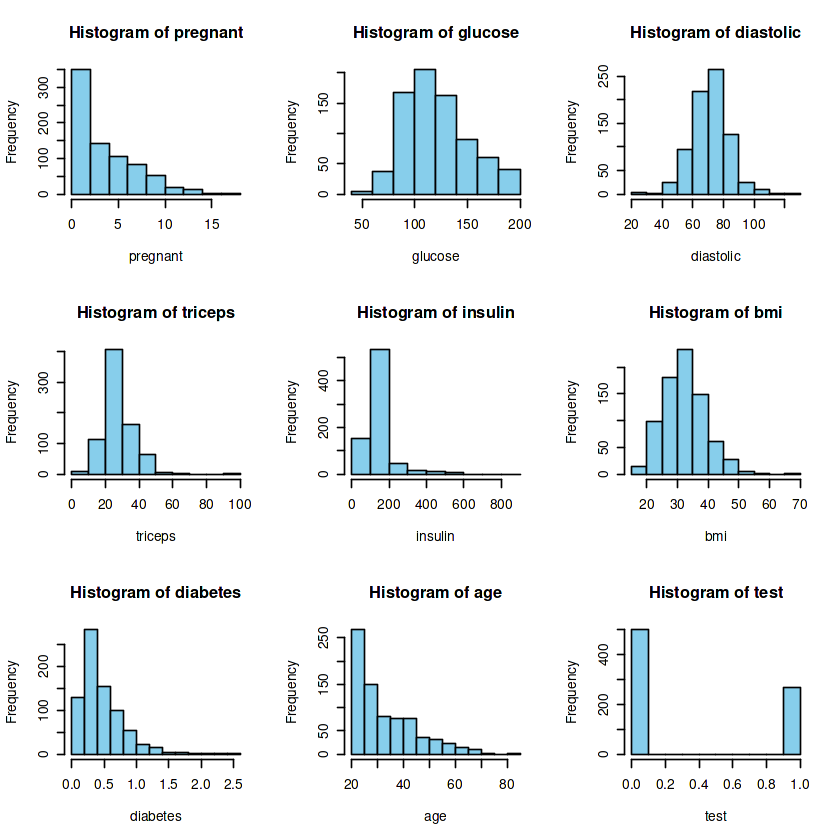

In [101]:
library(mlbench)

# Load the pima indians dataset

# Inspect the dataset
head(data)

# Plot histograms for all numeric columns
par(mfrow = c(3, 3))  # Set layout to 3x3 for multiple plots (adjust as needed)

for (col in colnames(data)) {
  if (is.numeric(data[[col]])) {  # Check if the column is numeric
    hist(data[[col]],
         main = paste("Histogram of", col),
         xlab = col,
         col = "skyblue",
         border = "black")
  }
}

In [102]:
#install.packages("mgcv")  

In [103]:
library(mgcv)
linear_model <- glm(test ~ .,
                    family = binomial, data = data)

# Summary of the linear model
summary(linear_model)


Call:
glm(formula = test ~ ., family = binomial, data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.0967954  0.8125684 -11.195  < 2e-16 ***
pregnant     0.1250180  0.0323845   3.860 0.000113 ***
glucose      0.0373503  0.0038787   9.630  < 2e-16 ***
diastolic   -0.0088036  0.0085614  -1.028 0.303810    
triceps      0.0034830  0.0131395   0.265 0.790952    
insulin     -0.0007875  0.0011736  -0.671 0.502194    
bmi          0.0931107  0.0178394   5.219  1.8e-07 ***
diabetes     0.8660799  0.2963413   2.923 0.003471 ** 
age          0.0131406  0.0095104   1.382 0.167061    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.48  on 767  degrees of freedom
Residual deviance: 713.30  on 759  degrees of freedom
AIC: 731.3

Number of Fisher Scoring iterations: 5


In [104]:
AIC(linear_model)

[1] 731.3001

In [105]:
head(data)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35.00000,155.5482,33.6,0.627,50,1
2,1,85,66,29.00000,155.5482,26.6,0.351,31,0
3,8,183,64,29.15342,155.5482,23.3,0.672,32,1
4,1,89,66,23.00000,94.0000,28.1,0.167,21,0
5,0,137,40,35.00000,168.0000,43.1,2.288,33,1
6,5,116,74,29.15342,155.5482,25.6,0.201,30,0


In [106]:
names(data)

[1] "pregnant"  "glucose"   "diastolic" "triceps"   "insulin"   "bmi"      
[7] "diabetes"  "age"       "test"

In [107]:
AIC(linear_model)

[1] 731.3001

In [108]:
library(MASS) # for stepAIC function 
stepAIC(linear_model)

Start:  AIC=731.3
test ~ pregnant + glucose + diastolic + triceps + insulin + bmi + 
    diabetes + age

            Df Deviance    AIC
- triceps    1   713.37 729.37
- insulin    1   713.74 729.74
- diastolic  1   714.36 730.36
- age        1   715.20 731.20
<none>           713.30 731.30
- diabetes   1   722.05 738.05
- pregnant   1   728.74 744.74
- bmi        1   742.64 758.64
- glucose    1   830.73 846.73

Step:  AIC=729.37
test ~ pregnant + glucose + diastolic + insulin + bmi + diabetes + 
    age

            Df Deviance    AIC
- insulin    1   713.81 727.81
- diastolic  1   714.43 728.43
- age        1   715.32 729.32
<none>           713.37 729.37
- diabetes   1   722.15 736.15
- pregnant   1   728.86 742.86
- bmi        1   754.72 768.72
- glucose    1   831.05 845.05

Step:  AIC=727.81
test ~ pregnant + glucose + diastolic + bmi + diabetes + age

            Df Deviance    AIC
- diastolic  1   714.78 726.78
- age        1   715.73 727.73
<none>           713.81 727.81
- dia


Call:  glm(formula = test ~ pregnant + glucose + bmi + diabetes, family = binomial, 
    data = data)

Coefficients:
(Intercept)     pregnant      glucose          bmi     diabetes  
   -9.18980      0.14334      0.03692      0.08866      0.88233  

Degrees of Freedom: 767 Total (i.e. Null);  763 Residual
Null Deviance:	    993.5 
Residual Deviance: 716.2 	AIC: 726.2

In [109]:
full_smooth_model <- gam(test ~ s(pregnant) + s(glucose) + s(diastolic) + s(triceps) + s(insulin) + s(bmi) + s(diabetes) +  s(age),
                         family = binomial, data = data)

# Sommario del modello
summary(full_smooth_model)


Family: binomial 
Link function: logit 

Formula:
test ~ s(pregnant) + s(glucose) + s(diastolic) + s(triceps) + 
    s(insulin) + s(bmi) + s(diabetes) + s(age)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0629     0.1173  -9.058   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df Chi.sq  p-value    
s(pregnant)  1.000  1.000  2.040 0.153268    
s(glucose)   1.000  1.000 85.685  < 2e-16 ***
s(diastolic) 1.000  1.000  2.170 0.140759    
s(triceps)   1.000  1.000  0.073 0.787053    
s(insulin)   7.366  8.333 16.462 0.053711 .  
s(bmi)       3.845  4.830 32.889 5.68e-06 ***
s(diabetes)  1.797  2.259 12.820 0.002351 ** 
s(age)       3.634  4.497 22.131 0.000424 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.385   Deviance explained = 35.1%
UBRE = -0.10441  Scale est. = 1         n = 768

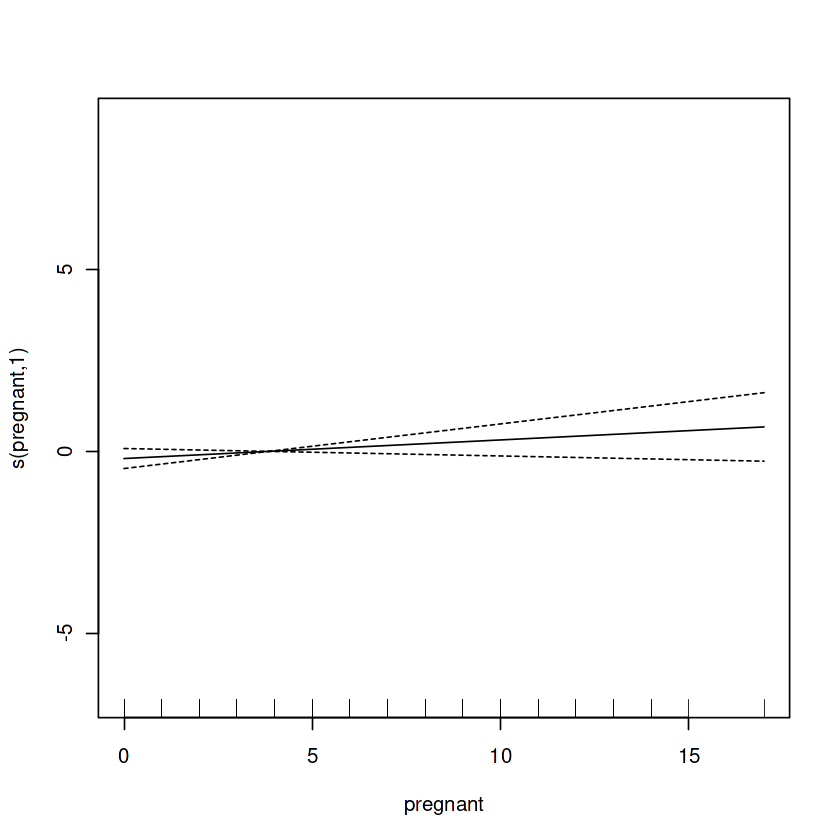

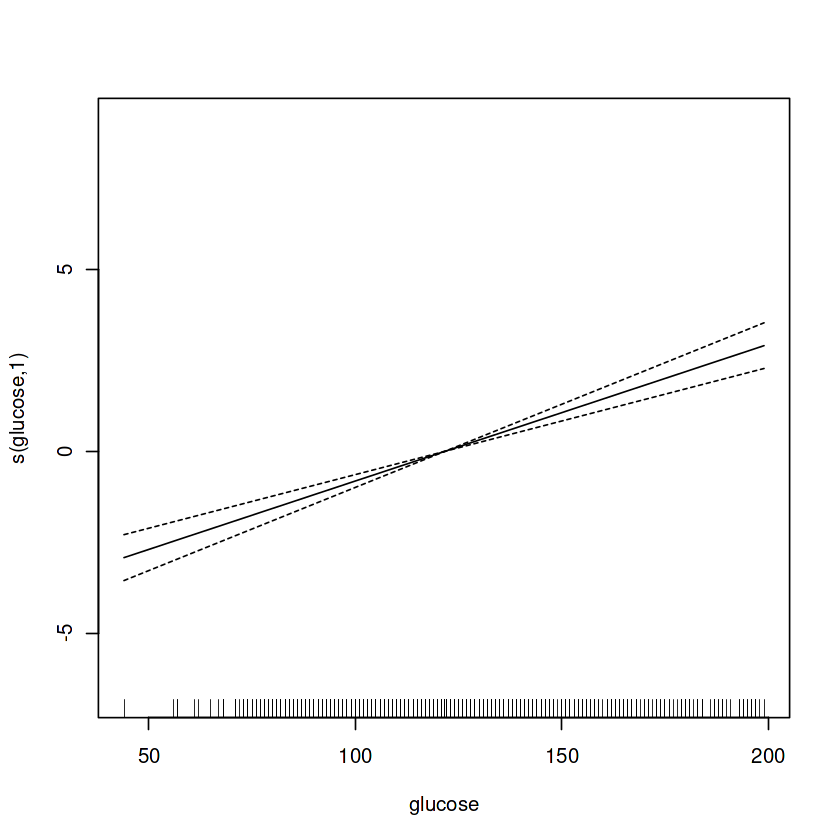

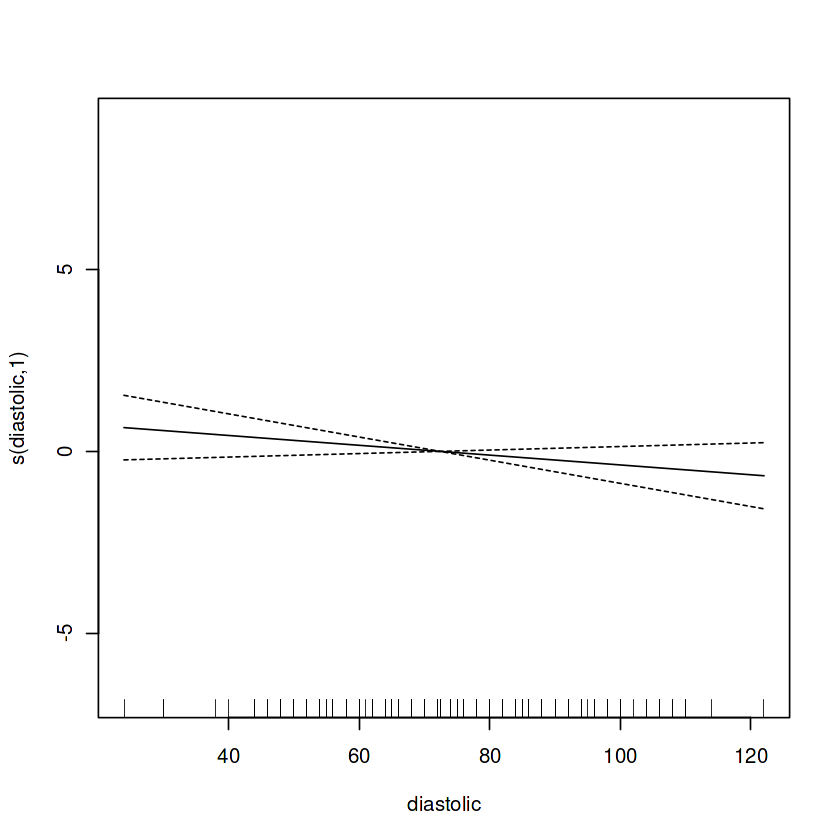

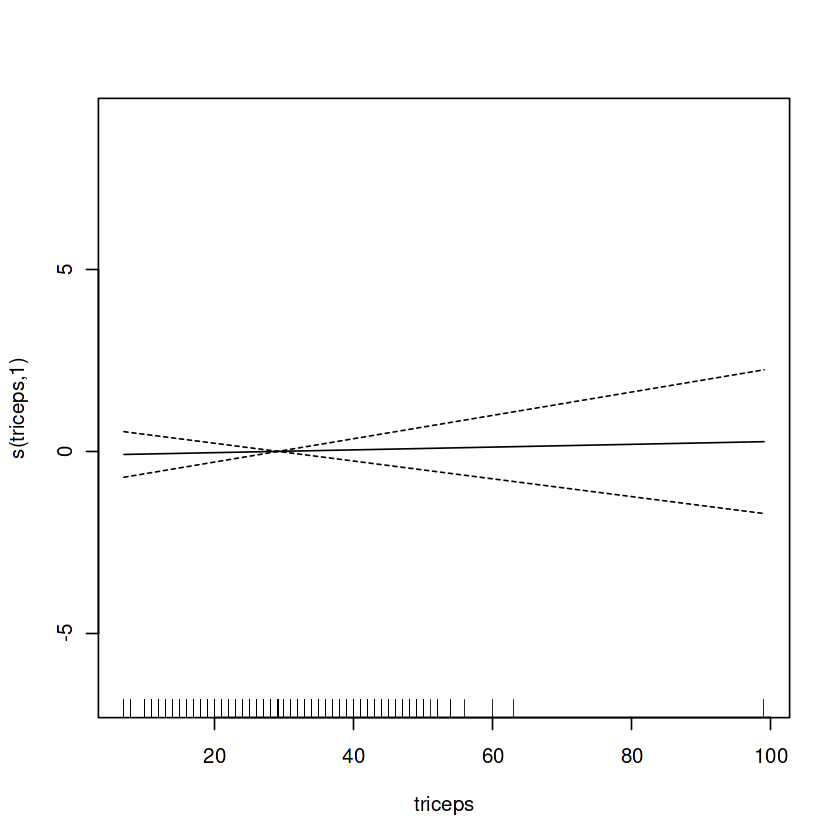

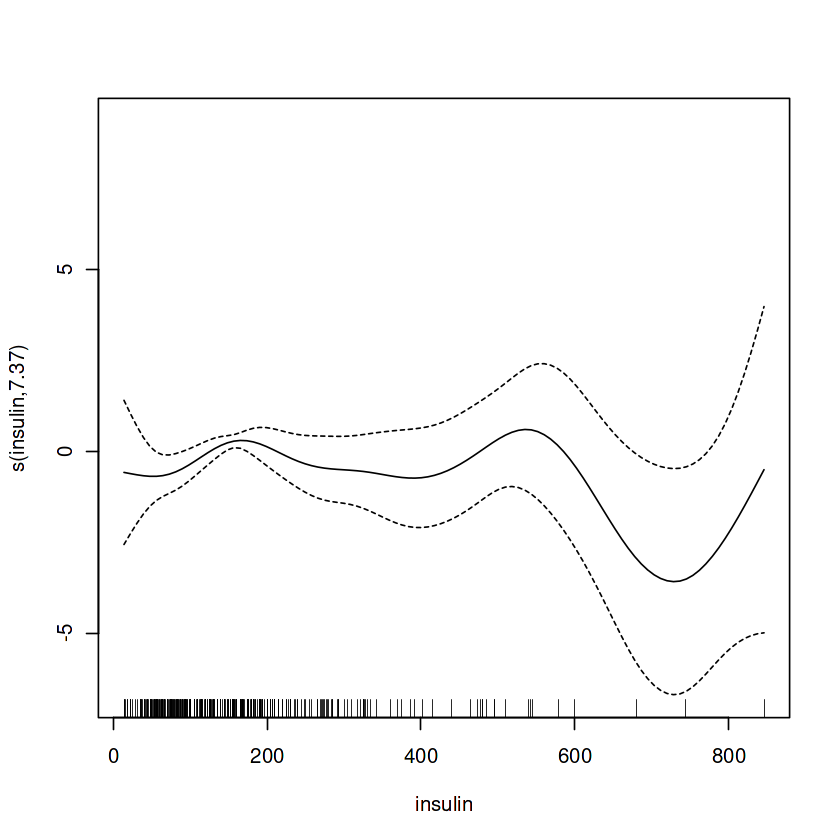

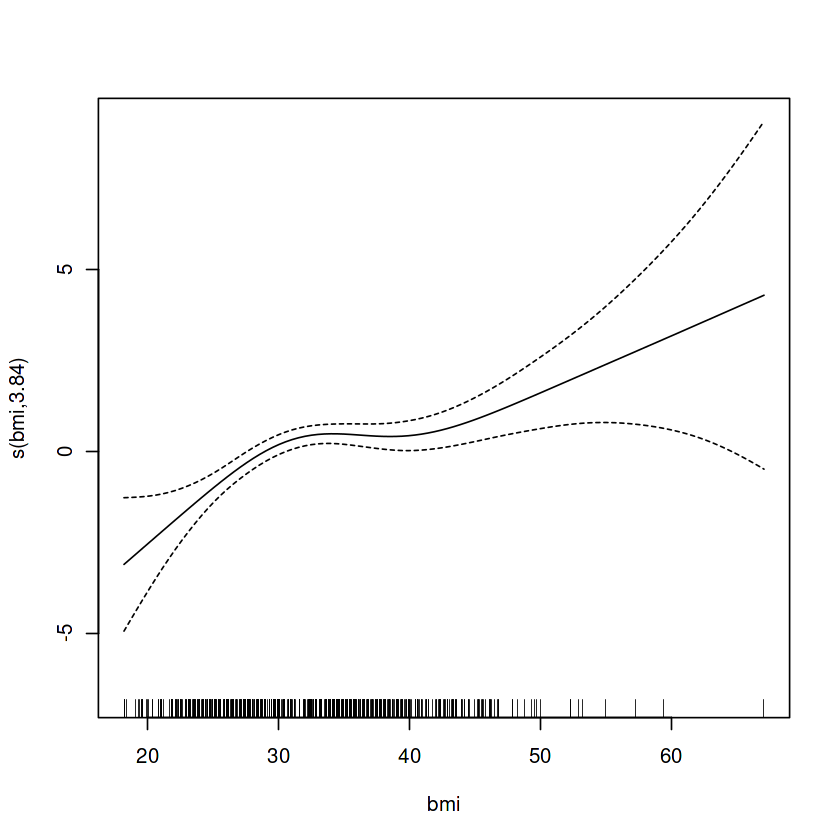

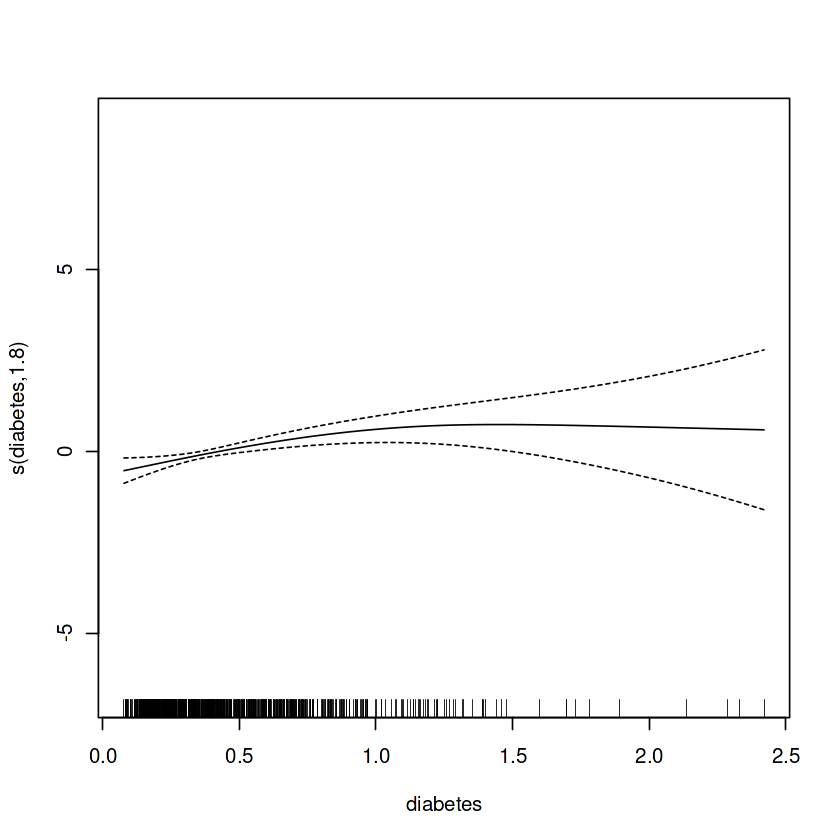

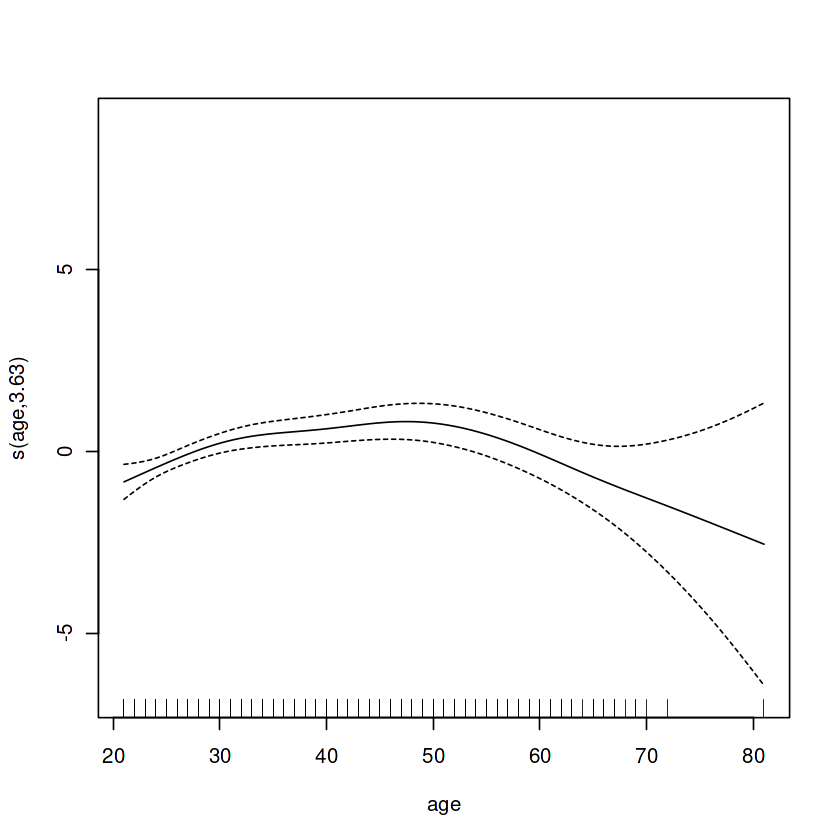

In [110]:
plot(full_smooth_model)

In [111]:
#install.packages("MASS")


In [112]:
AIC(full_smooth_model)

[1] 687.8155

In [120]:
model <- gam(test ~  s(glucose) + s(diastolic) + s(insulin) + s(bmi) + s(diabetes) +  s(age), family = binomial, data = data)
summary(model)


Family: binomial 
Link function: logit 

Formula:
test ~ s(glucose) + s(diastolic) + s(insulin) + s(bmi) + s(diabetes) + 
    s(age)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0602     0.1166  -9.095   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df Chi.sq  p-value    
s(glucose)   1.000  1.000 85.376  < 2e-16 ***
s(diastolic) 1.000  1.000  2.156  0.14210    
s(insulin)   7.267  8.261 16.184  0.05378 .  
s(bmi)       3.822  4.802 37.087 4.68e-07 ***
s(diabetes)  1.833  2.307 12.697  0.00267 ** 
s(age)       3.624  4.474 39.884  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.386   Deviance explained = 34.9%
UBRE = -0.10699  Scale est. = 1         n = 768

In [121]:
AIC(model)


[1] 685.8302


Method: UBRE   Optimizer: outer newton
full convergence after 8 iterations.
Gradient range [-2.121081e-07,1.623851e-08]
(score -0.1069919 & scale 1).
Hessian positive definite, eigenvalue range [1.339675e-07,0.002815946].
Model rank =  55 / 55 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

               k'  edf k-index p-value
s(glucose)   9.00 1.00    0.97    0.23
s(diastolic) 9.00 1.00    1.05    0.94
s(insulin)   9.00 7.27    1.00    0.49
s(bmi)       9.00 3.82    1.01    0.65
s(diabetes)  9.00 1.83    1.00    0.57
s(age)       9.00 3.62    0.99    0.51


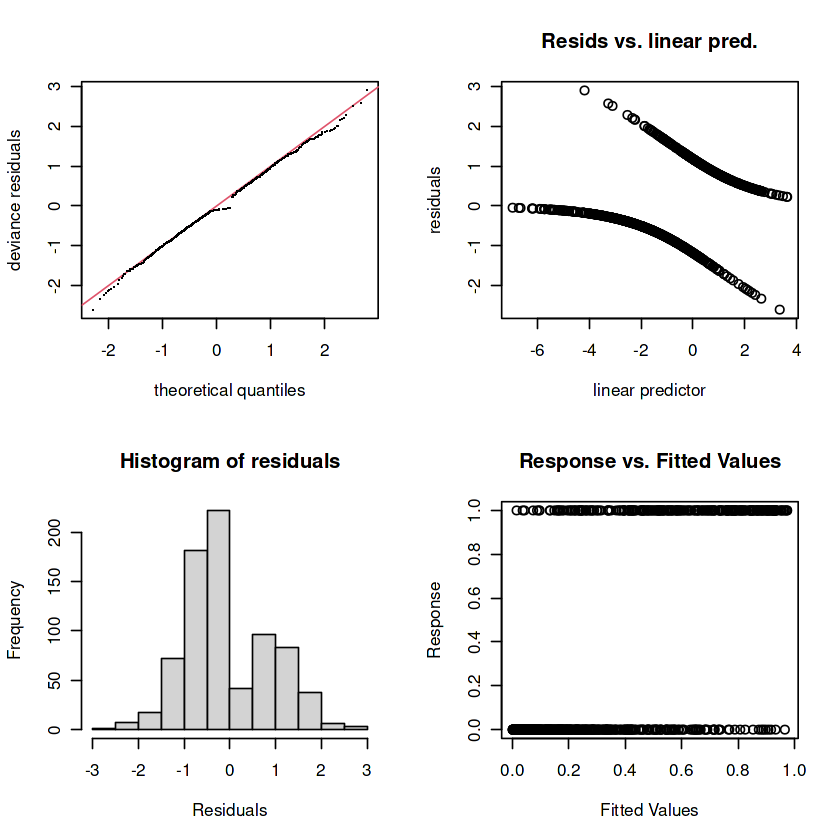

In [123]:
gam.check(model)

In [116]:
cat("Deviance explained:", summary(model)$dev.expl, "\n")


Deviance explained: 0.349021 


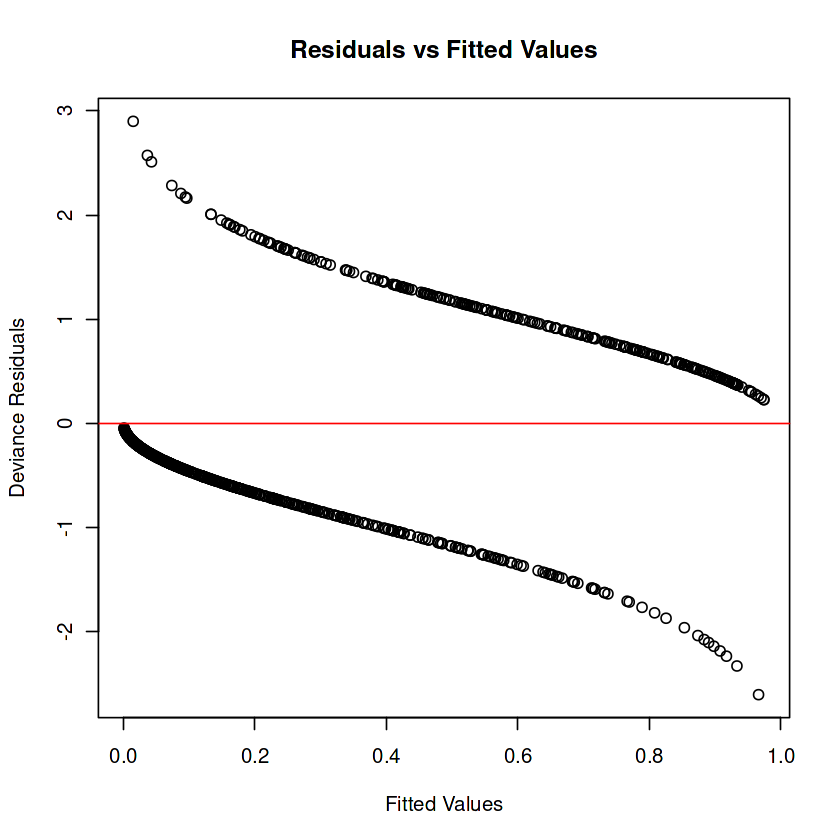

In [117]:
residuals_deviance <- residuals(model, type = "deviance")
# Extract fitted values
fitted_values <- fitted(model)

# Plot residuals vs fitted values
plot(fitted_values, residuals_deviance, 
     main = "Residuals vs Fitted Values", 
     xlab = "Fitted Values", 
     ylab = "Deviance Residuals")
abline(h = 0, col = "red")  # Add a horizontal line at zero for reference


## just playing around

In [118]:
new_data <- data.frame(
  glucose = c(90, 120, 150),
  diastolic = c(80, 85, 90),
  bmi = c(25, 30, 35),
  diabetes = c(1, 0.5, 1.2),
  age = c(30, 40, 50)
)
predictions <- predict(model, newdata = new_data, type = "response")
print(predictions)
model.threshold

Warning message in predict.gam(model, newdata = new_data, type = "response"):
“not all required variables have been supplied in  newdata!
”


ERROR: Error in eval(predvars, data, env): object 'insulin' not found
